### Import necessary dependencies

In [6]:
import os
import h5py
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms.functional as TF
from torchvision.transforms.functional import to_pil_image
import torch.nn.functional as F
import matplotlib.pyplot as plt
from PIL import Image
import random
from torchvision.transforms import ToPILImage

torch.manual_seed(42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Defining modcrop function
- Make sure the image's width and height is completely divisible by the scale that we want to downsample the image to.

In [2]:
def modcrop(img, scale):
    h, w = img.shape[1], img.shape[2]  # img = torch.Size([3, H, W])
    h = h - (h % scale)
    w = w - (w % scale)
    img = img[:, :h, :w]
    return img

### Define preprocessing function and function to display the GT and LR version of an image
- Downsample each images in a folder and return a tuple containing the GT and input image

In [27]:
def preprocess_images_in_folder(folder_path, scale):
    processed_images = []

    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        input_image = Image.open(img_path).convert('RGB')
        input_image = TF.to_tensor(input_image).float()  # Convert to tensor and change to float

        # Process image for GT (ground truth) and LR (low resolution)
        GT = modcrop(input_image, scale)
        LR = TF.resize(GT, [GT.shape[1] // scale, GT.shape[2] // scale], interpolation=TF.InterpolationMode.BICUBIC)
        LR = TF.resize(LR, [GT.shape[1], GT.shape[2]], interpolation=TF.InterpolationMode.BICUBIC)
            
        processed_images.append((LR, GT))
    
    return processed_images

input_image_path = 'bird_GT.bmp'
input_image = Image.open(input_image_path).convert('RGB')

# Convert the image to tensor
input_image = TF.to_tensor(input_image).float()  # Change to float

scale = 3

# Process image for label and input
im_label = modcrop(input_image, scale)
im_input = TF.resize(im_label, [im_label.shape[1] // scale, im_label.shape[2] // scale], interpolation=TF.InterpolationMode.BICUBIC)
im_input = TF.resize(im_input, [im_label.shape[1], im_label.shape[2]], interpolation=TF.InterpolationMode.BICUBIC)

# Display the label image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(im_label.permute(1, 2, 0))
plt.title('Label Image (Ground Truth)')
plt.axis('off')

# Display the input image
plt.subplot(1, 2, 2)
plt.imshow(im_input.permute(1, 2, 0))
plt.title('Input Image (Low Resolution)')
plt.axis('off')

plt.show()

In [48]:
def display_image(LR, GT):
    
    # Display the label image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(GT.permute(1, 2, 0))
    plt.title('Ground Truth (GT)')
    plt.axis('off')
    
    # Display the input image
    plt.subplot(1, 2, 2)
    plt.imshow(LR.permute(1, 2, 0))
    plt.title('Low Resolution (LR)')
    plt.axis('off')

    plt.show()

### Preprocessing training images

In [53]:

train_folder_path = 'data/Train/'
test_set5_folder_path = 'data/Test/Set5/'
test_set14_folder_path = 'data/Test/Set14/'
scale = 3

processed_train_images = preprocess_images_in_folder(train_folder_path, scale)
processed_test_set5_images = preprocess_images_in_folder(test_set5_folder_path, scale)
processed_test_set14_images = preprocess_images_in_folder(test_set14_folder_path, scale)

### Display random test images from Set5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


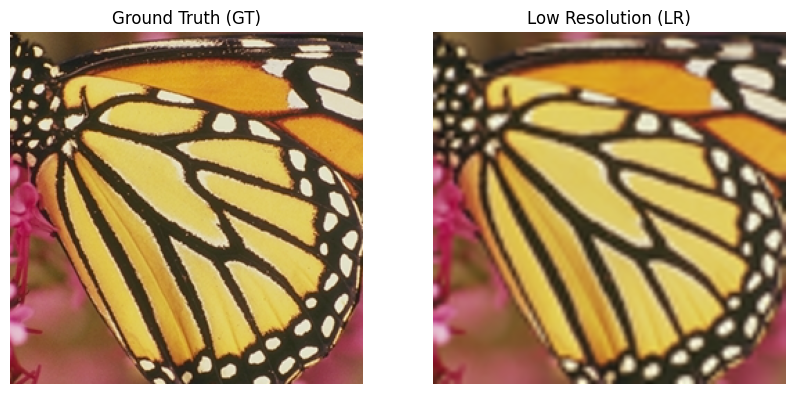

In [52]:
# Select a random image from the preprocessed images
random_image = random.choice(processed_test_set5_images)
LR, GT = random_image

# Display the random image
display_image(LR, GT)